In [1]:
# Real estate data analysis (after Covid outbreak - February till July 16, 2020 )

In [2]:
# import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# loading property sales data file
ppt_df = pd.read_csv('Resources/vic-sales-postcovid.csv')

In [4]:
# calculating stats

avg_price = ppt_df.price.mean()
median_price = ppt_df.price.median()
lowest_price = ppt_df.price.min()
highest_price = ppt_df.price.max()

lowest_priced_sub = ppt_df.loc[ppt_df['price']==lowest_price]['suburb'].values
highest_priced_sub = ppt_df.loc[ppt_df['price']==highest_price]['suburb'].values

In [5]:
# lowest & highest values property sold
print('--------------------------------------------------------------------')
print(f"The suburb has the lowest price property sold at AU$ {lowest_price:0,.0f} in {lowest_priced_sub}");
print(f"The suburb has the highest price property sold at AU$ {highest_price:0,.0f} in {highest_priced_sub}");
print('---------------------------------------------------------------------')

--------------------------------------------------------------------
The suburb has the lowest price property sold at AU$ 1,000 in ['Werribee']
The suburb has the highest price property sold at AU$ 7,573,100 in ['Craigieburn']
---------------------------------------------------------------------


In [6]:
# Calculation of IQR and Outliers


quartiles = ppt_df.price.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# print(f"The lower quartile of property price is: {lowerq:0,.0f}")
# print(f"The upper quartile of property price is: {upperq:0,.0f}")
# print(f"The interquartile range of property price is: {iqr:0,.0f}")
# print(f"The median of property price is: {quartiles[0.5]:0,.0f}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# print(f"* Values below {lower_bound:0,.0f} could be outliers.")
# print(f"* Values above {upper_bound:0,.0f} could be outliers.")

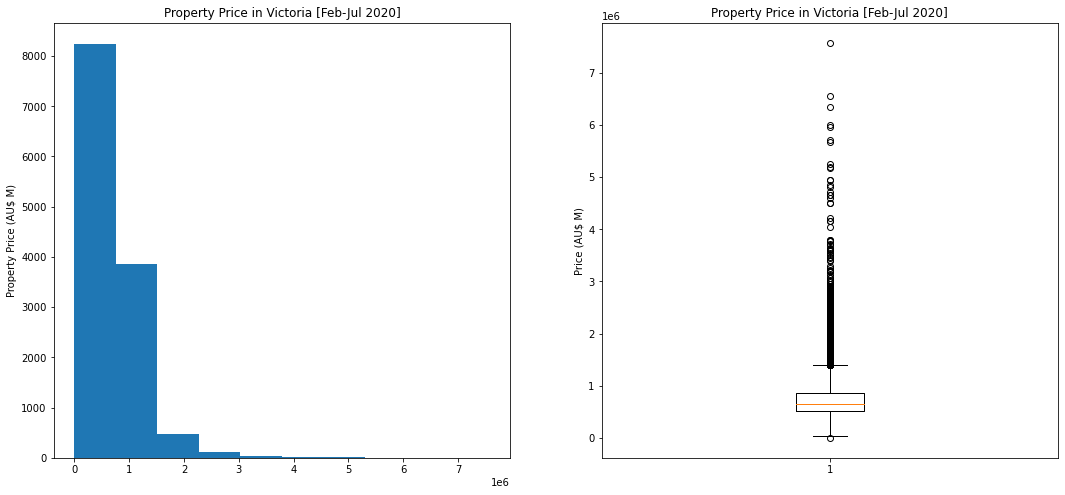

------------------------------------------------------------
The average values of property sold is: AU$ 767,924
The median values of property sold is: AU$ 652,000
------------------------------------------------------------
                                                                         525,000 is the lower quartile of property price
                                                                         872,500 is the upper quartile of property price
                                                                         347,500 is the interquartile range of property price
                                                                         652,000 is the median of property price

              * Values less than 3,750 or greater than 1,393,750 could be outliers.


In [109]:
# histogram chart

plt.figure(figsize=(18,8))

plt.subplot(1, 2, 1)

plt.hist(ppt_df.price);
plt.ylabel("Property Price (AU$ M)")

plt.title('Property Price in Victoria [Feb-Jul 2020]')
# boxplot chart

plt.subplot(1, 2, 2)

plt.boxplot(ppt_df.price);
plt.title('Property Price in Victoria [Feb-Jul 2020]')
plt.ylabel('Price (AU$ M)')
plt.show()

print('------------------------------------------------------------')
print(f"The average values of property sold is: AU$ {avg_price:0,.0f}")
print(f"The median values of property sold is: AU$ {median_price:0,.0f}")
print('------------------------------------------------------------')

txt1 = f"{lowerq:0,.0f}"
txt2 = f"{upperq:0,.0f}"
txt3 = f"{iqr:0,.0f}"
txt4 = f"{quartiles[0.5]:0,.0f}"
print(txt1.rjust(80), "is the lower quartile of property price" )
print(txt2.rjust(80), "is the upper quartile of property price")
print(txt3.rjust(80), "is the interquartile range of property price")
print(txt4.rjust(80), "is the median of property price\n")
print(f"              * Values less than {lower_bound:0,.0f} or greater than {upper_bound:0,.0f} could be outliers.")


In [8]:
# removing the properties values less than $10,000
rm_index = ppt_df.loc[ppt_df.price < 5000]
ppt_df = ppt_df.drop(rm_index.index)

In [9]:
ppt_by_date = ppt_df.groupby('date_sold').count().reset_index()
ppt_by_date.head()

,date_sold,Unnamed: 0,price,suburb,city_name,state,lat,lon,bedrooms,property_type,loc_pid,lga_pid,Postcode
0,2020-02-01,71,71,71,71,71,71,71,71,71,71,71,71
1,2020-02-02,18,18,18,18,18,18,18,18,18,18,18,18
2,2020-02-03,80,80,80,80,80,80,80,80,80,80,80,80
3,2020-02-04,93,93,93,93,93,93,93,93,93,93,93,93
4,2020-02-05,67,67,67,67,67,67,67,67,67,67,67,67


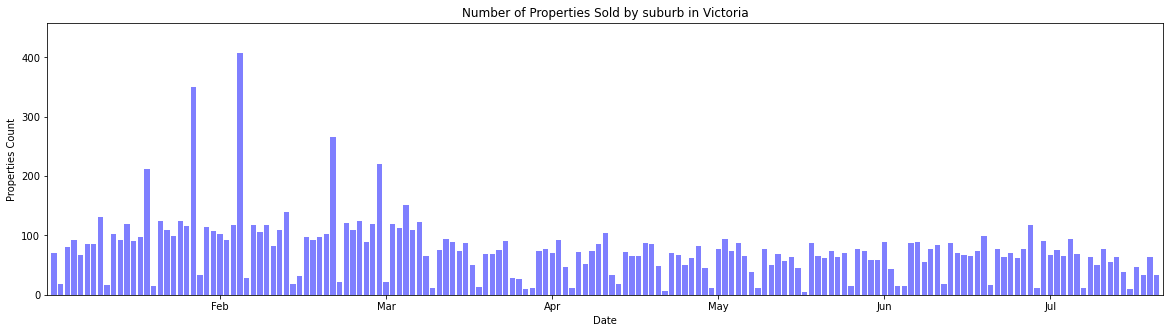

In [10]:
# property sold by date
y_axis = ppt_by_date.suburb
x_axis = ppt_by_date.date_sold

plt.figure(figsize=(20,5))
plt.bar(x_axis, y_axis, color='b', alpha=0.5, align="center")

tick_locations = [25, 50, 75, 100, 125, 150]
plt.xticks(tick_locations, ["Feb", "Mar", "Apr", "May", "Jun","Jul"])
plt.xlim(-1, len(x_axis))
plt.ylim(0, max(y_axis)+50)
plt.xlabel('Date')
plt.ylabel('Properties Count')
plt.title('Number of Properties Sold by suburb in Victoria')
plt.show()

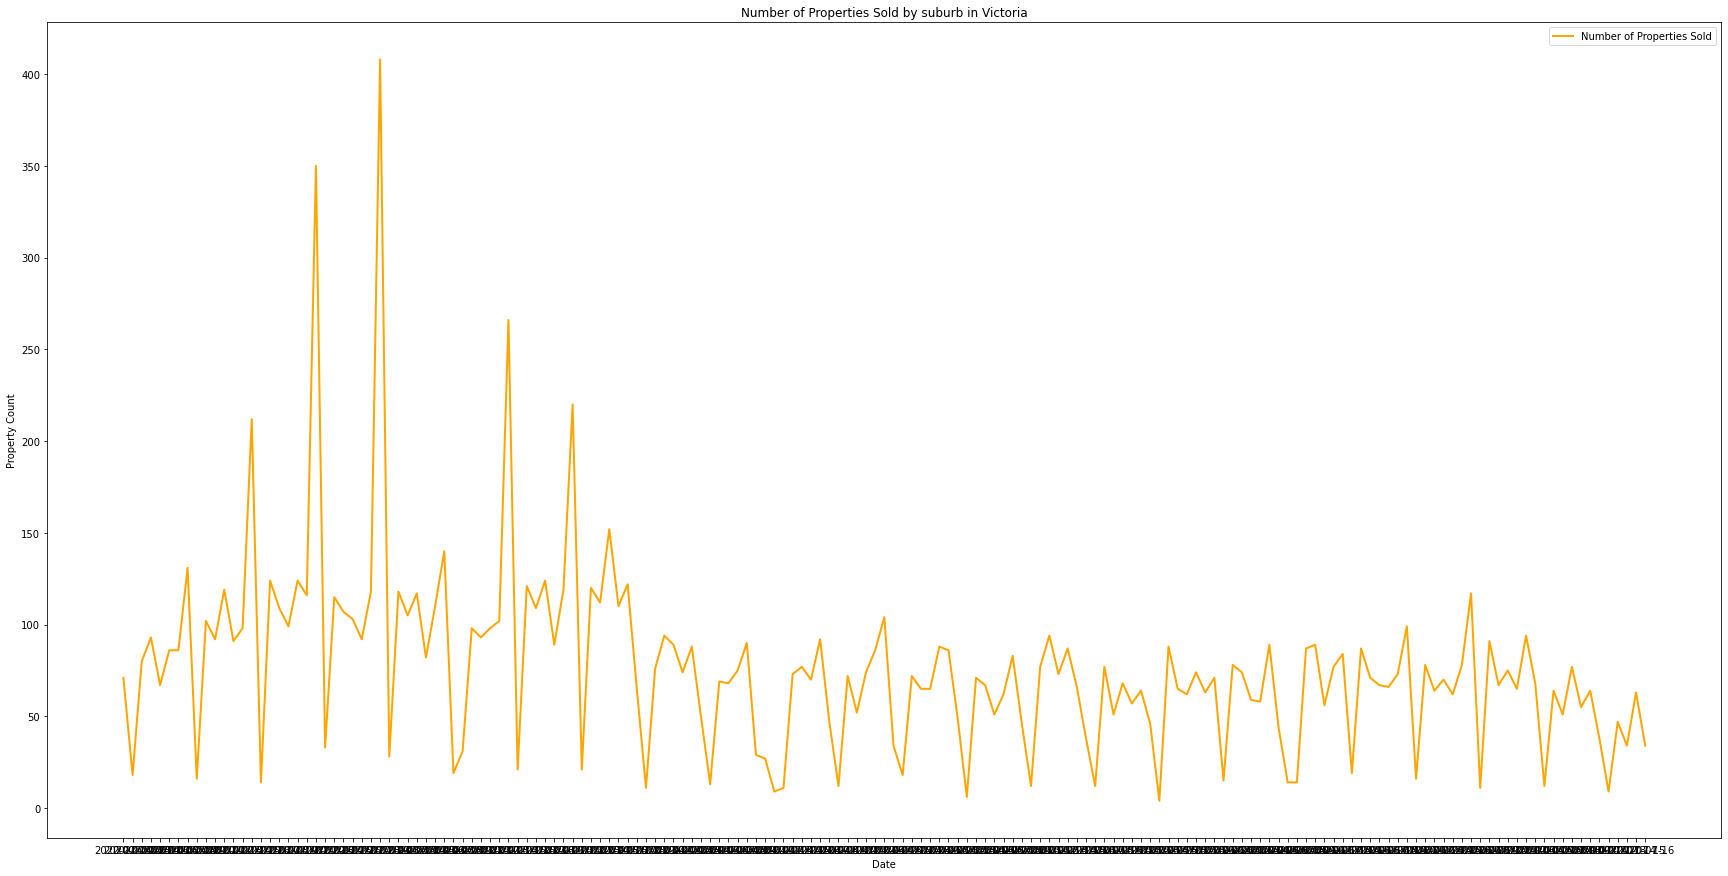

In [54]:
plt.figure(figsize=(30,15))

#ppt_by_date.plot(x = 'date_sold', y= 'suburb', color='orange', label='Number of Properties Sold', linewidth= 2)
x = ppt_by_date.date_sold
y = ppt_by_date.suburb
plt.plot(x, y, color='orange', label='Number of Properties Sold', linewidth= 2)
plt.ylabel('Property Count')
plt.xlabel('Date')
plt.title('Number of Properties Sold by suburb in Victoria')
plt.legend(loc='best')
#plt.grid()
plt.show()

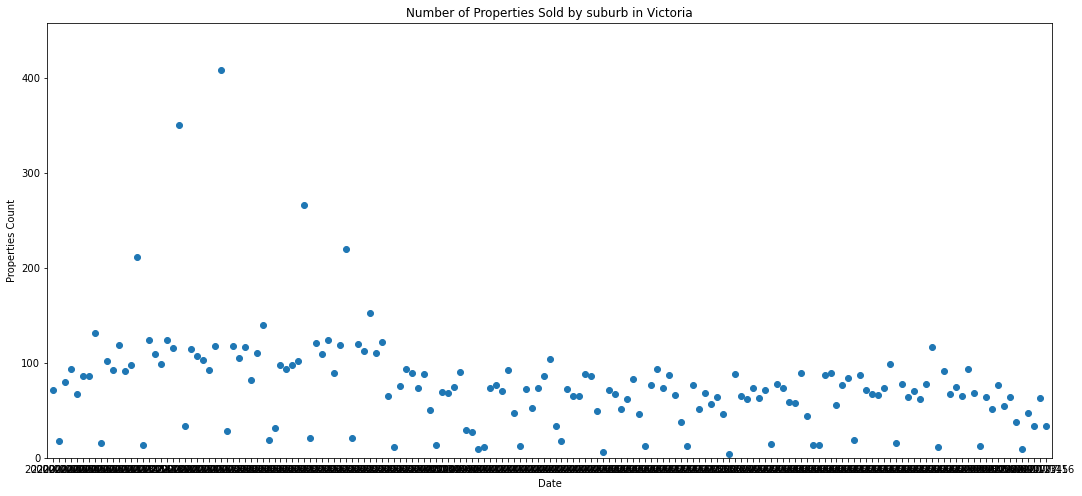

In [12]:

x = ppt_by_date.date_sold
y = ppt_by_date.suburb



plt.figure(figsize=(18,8))
plt.scatter(x, y)
plt.xlim(-1, len(x_axis))
plt.ylim(0, max(y_axis)+50)
plt.xlabel('Date')
plt.ylabel('Properties Count')
plt.title('Number of Properties Sold by suburb in Victoria')

plt.show()

In [13]:
# grouping properties sold by month
ppt_by_date['date_sold'] = ppt_by_date['date_sold'].astype(str);
ppt_by_date['month_sold'] = ppt_by_date.date_sold.apply(lambda x: x[5:7])
ppt_by_month = ppt_by_date.groupby('month_sold').sum().reset_index()
ppt_by_month

,month_sold,Unnamed: 0,price,suburb,city_name,state,lat,lon,bedrooms,property_type,loc_pid,lga_pid,Postcode
0,02,3274,3274,3274,3274,3274,3274,3274,3274,3274,3274,3274,3274
1,03,3093,3093,3093,3093,3093,3093,3093,3093,3093,3093,3093,3093
2,04,1793,1793,1793,1793,1793,1793,1793,1793,1793,1793,1793,1793
3,05,1785,1785,1785,1785,1785,1785,1785,1785,1785,1785,1785,1785
4,06,1959,1959,1959,1959,1959,1959,1959,1959,1959,1959,1959,1959
5,07,850,850,850,850,850,850,850,850,850,850,850,850


In [14]:
covid_df = pd.read_excel('Resources/covid_data.xlsx')

In [15]:
covid_df['Date'] = covid_df['Date'].astype(str)
covid_df['Cases'] = covid_df['Cases'].astype(int)
covid_df['Month'] = covid_df.Date.apply(lambda x: x[x.rfind('2020')-2:x.rfind('2020')])

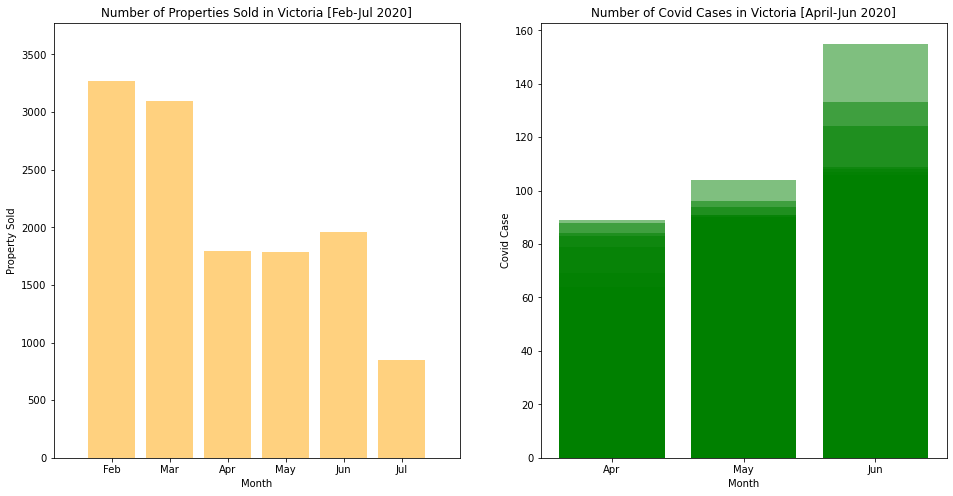

In [141]:
# property sold chart

plt.figure(figsize=(16,8))

plt.subplot(1, 2, 1)

y_axis = ppt_by_month.suburb
x_axis = ppt_by_month.month_sold
plt.bar(x_axis, y_axis, color='orange', alpha=0.5, align="center")
tick_locations = [v for v in x_axis]
plt.xticks(tick_locations, ["Feb", "Mar", "Apr", "May", "Jun","Jul"])
plt.xlim(-1, len(x_axis))
plt.ylim(0, max(y_axis)+500)
plt.xlabel('Month')
plt.ylabel('Property Sold')
plt.title('Number of Properties Sold in Victoria [Feb-Jul 2020]')

# covid cases chart
plt.subplot(1, 2, 2)
x_axis = covid_df['Month'].astype(int)
y_axis = covid_df.Cases
 
plt.bar(x_axis, y_axis, color='green', alpha=0.5, align="center")
tick_locations = [4, 5, 6]
plt.xticks(tick_locations, ["Apr", "May", "Jun"])
#plt.xlim(5, len(x_axis)+5)
#plt.ylim(0, max(y_axis) + 5)
plt.xlabel('Month')
plt.ylabel('Covid Case')
plt.title('Number of Covid Cases in Victoria [April-Jun 2020]')
plt.show()


In [65]:
# grouping properties sold by lga
ppt_df = pd.read_csv('Resources/vic-sales-postcovid.csv')
ppt_lga_df = ppt_df.groupby(['date_sold','lga_pid']) #('count') 

#ppt_lga_df
#,inplace=True)
#ppt_df.reset_index() #head() #.groupby('lga_pid')[['date_sold','suburb']].count()

In [66]:
sorted_ppt_df = ppt_df.sort_values(by=['date_sold','lga_pid'])
sorted_ppt_df.head()

,Unnamed: 0,date_sold,price,suburb,city_name,state,lat,lon,bedrooms,property_type,loc_pid,lga_pid,Postcode
13,45719,2020-02-01,940000.0,Clayton,Melbourne,VIC,-37.925969,145.117534,4,townhouse,VIC567,VIC104,3168.0
54,45760,2020-02-01,420000.0,Clayton,Melbourne,VIC,-37.913156,145.124122,2,unit,VIC567,VIC104,3168.0
65,45771,2020-02-01,1233000.0,Chadstone,Melbourne,VIC,-37.877231,145.104401,4,townhouse,VIC527,VIC104,3148.0
9,45715,2020-02-01,1320000.0,Yarrambat,Melbourne,VIC,-37.622742,145.143970,4,house,VIC2917,VIC106,3091.0
21,45727,2020-02-01,745000.0,Eltham,Melbourne,VIC,-37.706651,145.155218,3,house,VIC858,VIC106,3095.0


In [67]:
sorted_ppt_df = sorted_ppt_df[['date_sold','lga_pid','suburb','price']]
#lga_count = sorted_ppt_df['lga_pid'].value_counts().reset_index()
suburb_count = sorted_ppt_df['suburb'].value_counts().reset_index()
suburb_count = suburb_count.rename(columns={'index':'suburb', 'suburb':'property_sold'})
#dt_count = sorted_ppt_df['date_sold'].value_counts() #['lga_pid'].value_counts()
suburb_count.head()

,suburb,property_sold
0,Melbourne,418
1,Pakenham,389
2,Craigieburn,291
3,Frankston,273
4,Sunbury,256


In [68]:
# lga_count = lga_count.rename(columns={'index':'lga_pid', 'lga_pid':'property_sold'})
# lga_count['LGA_ID'] = lga_count.lga_pid.apply(lambda x: x[x.rfind('C')+1:x.rfind('C')+4])

# lga_count.head()

In [69]:
# suburb_lga_df = pd.read_csv('output/suburb_lga_postcode_df.csv')
# suburb_lga_df.LGA_ID = suburb_lga_df.LGA_ID.astype(str)
# suburb_lga_df = suburb_lga_df.rename(columns={'Suburb':'suburb'})
# suburb_lga_df




# # merging to get local government name
# merged_lga_df = pd.merge(sorted_ppt_df,suburb_lga_df , how = "left", on = "suburb")
# merged_lga_df.tail()

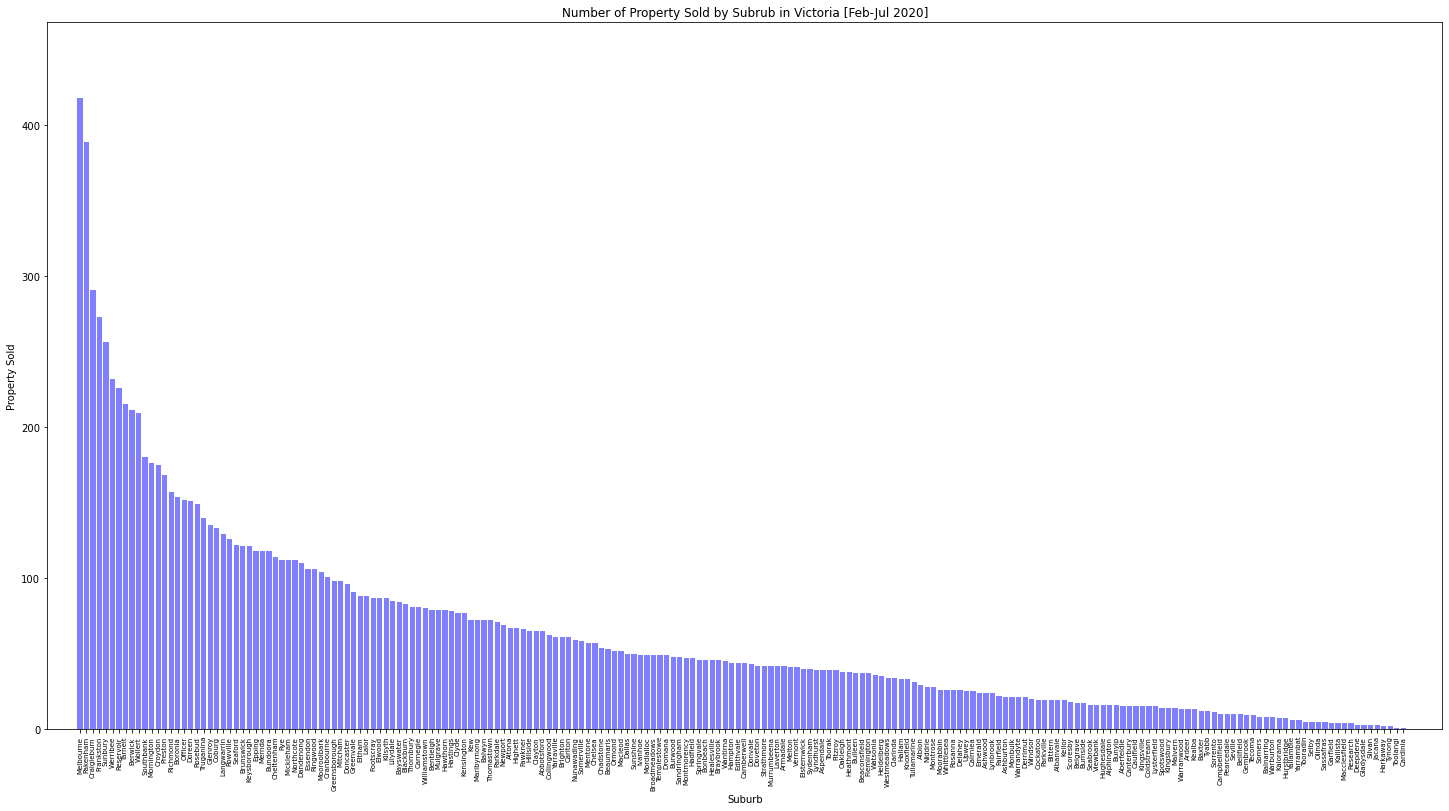

In [70]:
x_axis = suburb_count.suburb 
y_axis = suburb_count.property_sold

plt.figure(figsize=(25,13)) 
plt.bar(x_axis, y_axis, color='b', alpha=0.5, align="center")
tick_locations = [v for v in x_axis]
plt.xticks(tick_locations, x_axis, rotation='90', fontsize = 7 )
plt.xlim(-5, len(x_axis)+ 5)
plt.ylim(0, max(y_axis) + 50)
plt.xlabel('Suburb')
plt.ylabel('Property Sold')
plt.title('Number of Property Sold by Subrub in Victoria [Feb-Jul 2020]')
plt.show()

In [71]:
sorted_ppt_df['date_sold'] = sorted_ppt_df['date_sold'].astype(str);
sorted_ppt_df['date_sold'] = sorted_ppt_df.date_sold.apply(lambda x: x[5:7])
sorted_ppt_df['month_sold'] = sorted_ppt_df.groupby('month_sold').count()


KeyError: 'month_sold'

In [72]:
grouped_df = sorted_ppt_df.groupby(['date_sold','lga_pid'])['suburb'].value_counts()

,date_sold,lga_pid,suburb,price
13,02,VIC104,Clayton,940000.0
54,02,VIC104,Clayton,420000.0
65,02,VIC104,Chadstone,1233000.0
9,02,VIC106,Yarrambat,1320000.0
21,02,VIC106,Eltham,745000.0
...,...,...,...,...
12749,07,VIC96,Mickleham,467000.0
12754,07,VIC96,Sunbury,555000.0
12727,07,VIC97,Altona,1100000.0
12748,07,VIC97,Williamstown,1830000.0


In [76]:
grouped_df = sorted_ppt_df.groupby(['date_sold','lga_pid'])['suburb'].value_counts()
grouped_df

date_sold  lga_pid  suburb     
02         VIC101   Footscray      23
                    Yarraville     15
                    Braybrook      13
                    Maribyrnong    10
                    Kingsville      6
                                   ..
07         VIC98    Highett         2
                    Moorabbin       2
                    Clarinda        1
                    Mentone         1
                    Mordialloc      1
Name: suburb, Length: 1112, dtype: int64

In [119]:
grouped_df = sorted_ppt_df.groupby(['date_sold','lga_pid'])['suburb'].value_counts()
grouped_df

date_sold  lga_pid  suburb     
02         VIC101   Footscray      23
                    Yarraville     15
                    Braybrook      13
                    Maribyrnong    10
                    Kingsville      6
                                   ..
07         VIC98    Highett         2
                    Moorabbin       2
                    Clarinda        1
                    Mentone         1
                    Mordialloc      1
Name: suburb, Length: 1112, dtype: int64

In [135]:
mgrouped_df = pd.DataFrame(grouped_df)
mgrouped_df = mgrouped_df.rename(columns={'date_sold':'month_sold','lga_pid':'lga_id','suburb':'sub_counts'}) #.reset_index()
mgrouped_df.reset_index(inplace=True)

In [136]:
mgrouped_df

,date_sold,lga_pid,suburb,sub_counts
0,02,VIC101,Footscray,23
1,02,VIC101,Yarraville,15
2,02,VIC101,Braybrook,13
3,02,VIC101,Maribyrnong,10
4,02,VIC101,Kingsville,6
...,...,...,...,...
1107,07,VIC98,Highett,2
1108,07,VIC98,Moorabbin,2
1109,07,VIC98,Clarinda,1
1110,07,VIC98,Mentone,1


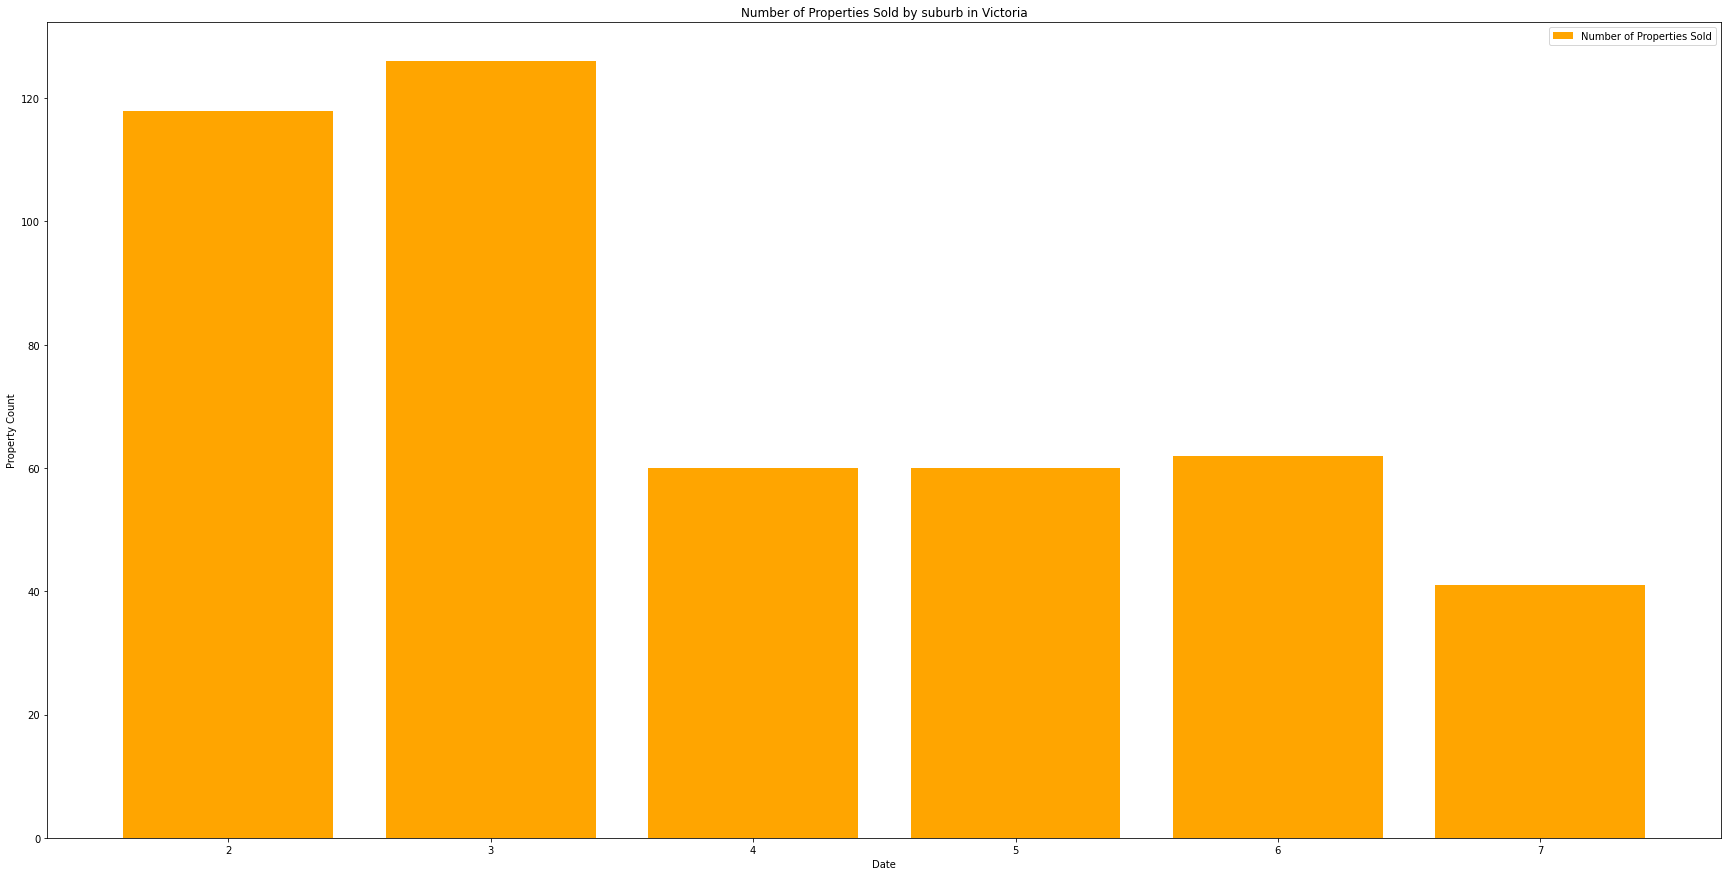

In [137]:
plt.figure(figsize=(30,15))


x = mgrouped_df.date_sold.astype(int)
y = mgrouped_df.sub_counts
plt.bar(x, y, color='orange', label='Number of Properties Sold', linewidth= 2)
plt.ylabel('Property Count')
plt.xlabel('Date')
plt.title('Number of Properties Sold by suburb in Victoria')
plt.legend(loc='best')
#plt.grid()
plt.show()

In [88]:
mgrouped_df = mgrouped_df.groupby(['date_sold','lga_pid','suburb']).sum()
mgrouped_df

sub_counts
date_sold lga_pid suburb                 
02        VIC101  Braybrook            13
                  Footscray            23
                  Kingsville            6
                  Maribyrnong          10
                  Yarraville           15
...                                   ...
07        VIC98   Highett               2
                  Mentone               1
                  Moorabbin             2
                  Mordialloc            1
                  Parkdale              4

[1112 rows x 1 columns]

In [74]:
feb_df = 

Melbourne      418
Pakenham       389
Craigieburn    291
Frankston      273
Sunbury        256
              ... 
Jacana           3
Harkaway         2
Tynong           2
Toolangi         1
Cardinia         1
Name: suburb, Length: 204, dtype: int64

In [53]:
sorted_ppt_df = sorted_ppt_df[['month_sold','lga_pid','suburb','price']]
#sorted_ppt_df = sorted_ppt_df.reset_index()
sorted_ppt_df


#sorted_ppt_df.to_csv('output/sorted_ppt.csv')

,month_sold,lga_pid,suburb,price
13,NaN,VIC104,Clayton,940000.0
54,NaN,VIC104,Clayton,420000.0
65,NaN,VIC104,Chadstone,1233000.0
9,NaN,VIC106,Yarrambat,1320000.0
21,NaN,VIC106,Eltham,745000.0
...,...,...,...,...
12749,NaN,VIC96,Mickleham,467000.0
12754,NaN,VIC96,Sunbury,555000.0
12727,NaN,VIC97,Altona,1100000.0
12748,NaN,VIC97,Williamstown,1830000.0


In [26]:
#sorted_ppt_df['LGA_ID'] = sorted_ppt_df.lga_pid.apply(lambda x: x[x.rfind('C')+1:x.rfind('C')+4])

In [27]:
#sorted_ppt_df

In [28]:
# grsorted_ppt_df = sorted_ppt_df.groupby(by=['month_sold','lga_pid'])
# grsorted_ppt_df.head()

In [29]:
# suburb_lga_df = pd.read_csv('output/suburb_lga_postcode_df.csv')
# suburb_lga_df.LGA_ID = suburb_lga_df.LGA_ID.astype(str)
# suburb_lga_df = suburb_lga_df.rename(columns={'Suburb':'suburb'})
# suburb_lga_df

In [30]:
# month_lga_lst = []
# mcount = 1

# for i, row in sorted_ppt_df.iterrows():
#     if not row['month_sold'] in month_lga_lst:
#         month_lga_lst.append(row['month_sold'])
#     if row['lga_pid'] in month_lga_lst:
#         mcount += 1
#     else:
#         month_lga_lst.append(row['lga_pid'])
#         month_lga_lst.append(mcount)
#         mcount =1
 